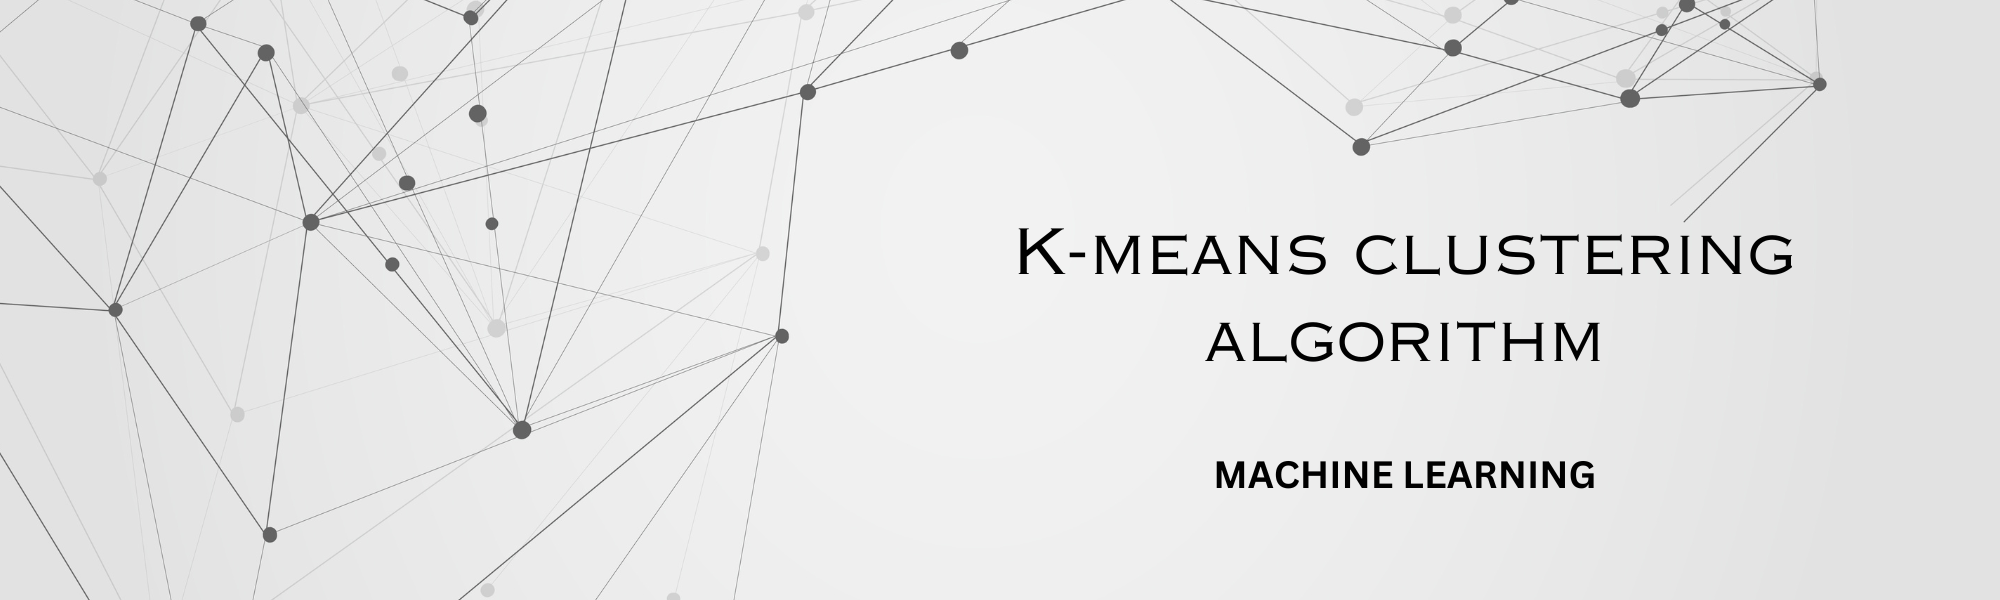

<span style="font-family: Arial; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #0074cc;">Prodigy InfoTech - Machine Learning Internship</span>
<hr style="height: 0.5px; border: 0; background-color: #0074cc;">


<span style="font-family: Arial; font-size: 25px; font-style: normal; font-weight: bold; letter-spacing: 3px; color: #0074cc;">Task- 02</span>
<hr style="height: 0.5px; border: 0; background-color: #0074cc;">


# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
plt.rcParams['figure.figsize']=[15,8]

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# Data Preprocessing

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No Null Values in this dataset

# Outlier Treatment

In [8]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
df1=df[~(((df>ul)|(df<ll)).any(axis=1))]
df1.shape

(198, 5)

In [9]:
df.shape

(200, 5)

# Skewness

In [10]:
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

The skewness are less

# Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
ss=StandardScaler()
df[['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]=ss.fit_transform(df[['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']])

# Encoding

In [14]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df.replace({'Male':0, 'Female':1},inplace=True)

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,0,-1.424569,-1.738999,-0.434801
1,-1.706091,0,-1.281035,-1.738999,1.195704
2,-1.688771,1,-1.352802,-1.700830,-1.715913
3,-1.671450,1,-1.137502,-1.700830,1.040418
4,-1.654129,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,1,-0.276302,2.268791,1.118061
196,1.671450,1,0.441365,2.497807,-0.861839
197,1.688771,0,-0.491602,2.497807,0.923953
198,1.706091,0,-0.491602,2.917671,-1.250054


# Principal Component Analysis

# Creating Covariance matrix

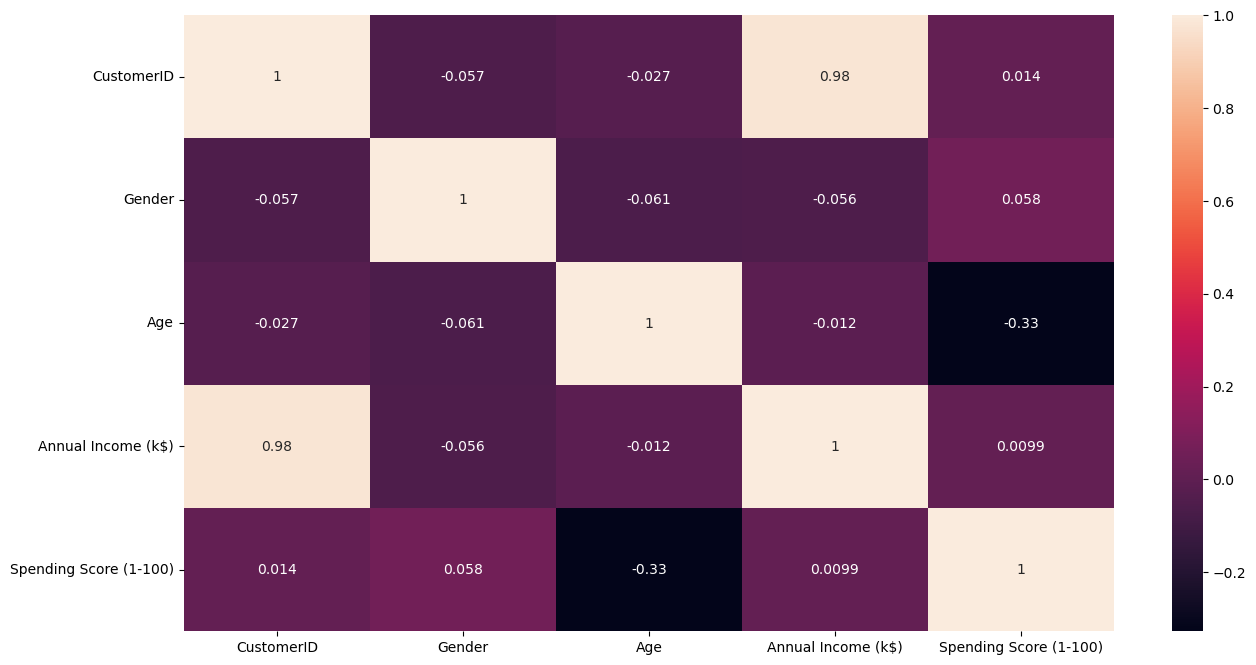

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
df.cov()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.005025,-0.028636,-0.026897,0.982461,0.013905
Gender,-0.028636,0.247638,-0.030366,-0.028142,0.028989
Age,-0.026897,-0.030366,1.005025,-0.012460,-0.328871
Annual Income (k$),0.982461,-0.028142,-0.012460,1.005025,0.009953
Spending Score (1-100),0.013905,0.028989,-0.328871,0.009953,1.005025


In [19]:
cov_mat=np.cov(df.T)
cov_mat

array([[ 1.00502513, -0.02863577, -0.02689738,  0.98246077,  0.01390451],
       [-0.02863577,  0.24763819, -0.0303656 , -0.0281418 ,  0.02898937],
       [-0.02689738, -0.0303656 ,  1.00502513, -0.01246034, -0.3288712 ],
       [ 0.98246077, -0.0281418 , -0.01246034,  1.00502513,  0.00995261],
       [ 0.01390451,  0.02898937, -0.3288712 ,  0.00995261,  1.00502513]])

In [20]:
eigen_val,eigen_vector=np.linalg.eig(cov_mat)
eigen_val,eigen_vector

(array([1.98988999, 1.33420214, 0.02245587, 0.24503713, 0.67615356]),
 array([[-7.06321066e-01,  2.74559896e-02,  7.07208880e-01,
         -1.44883022e-02, -1.55241196e-03],
        [ 2.18838211e-02, -4.02439310e-02,  2.94765525e-03,
         -9.98941913e-01, -2.80881460e-03],
        [ 3.71916514e-02,  7.05473456e-01,  1.07027919e-02,
         -2.95628653e-02,  7.07061151e-01],
        [-7.05984628e-01,  3.73332576e-02, -7.06917210e-01,
         -1.90835121e-02,  9.78831373e-03],
        [-2.88814310e-02, -7.06073668e-01,  6.47960227e-04,
          2.58263311e-02,  7.07077378e-01]]))

In [21]:
eig_val=list(eigen_val)
eig_val

[1.9898899877159282,
 1.3342021427839919,
 0.022455873033478596,
 0.24503712742872133,
 0.6761535625052165]

In [22]:
eig_val.sort(reverse=True)
eig_val

[1.9898899877159282,
 1.3342021427839919,
 0.6761535625052165,
 0.24503712742872133,
 0.022455873033478596]

In [23]:
per=[]
for i in eig_val:
    a=(i/sum(eig_val))*100
    per.append(a)
per

[46.62633142844171,
 31.262507820037488,
 15.84336837539305,
 5.7416150572620985,
 0.5261773188656558]

In [24]:
cum_var=np.cumsum(per)
cum_var

array([ 46.62633143,  77.88883925,  93.73220762,  99.47382268,
       100.        ])

In [25]:
len(cum_var[cum_var<99.2])

3

We can tell that 3 principal components can tell about 99.2% variation within the data

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=3)
pca_df=pd.DataFrame(data=pca.fit_transform(df),columns=['pc1','pc2','pc3'])
pca_df

,pc1,pc2,pc3
0,-2.392310,-0.787697,1.327469
1,-2.338323,-1.837220,0.073115
2,-2.402448,0.129623,2.185060
3,-2.318615,-1.664185,0.083917
4,-2.342272,-0.243046,0.693267
...,...,...,...
195,2.803016,-0.871947,-0.613597
196,2.893059,1.041328,0.276696
197,3.013451,-0.837036,-0.329114
198,3.259314,0.714124,1.203994


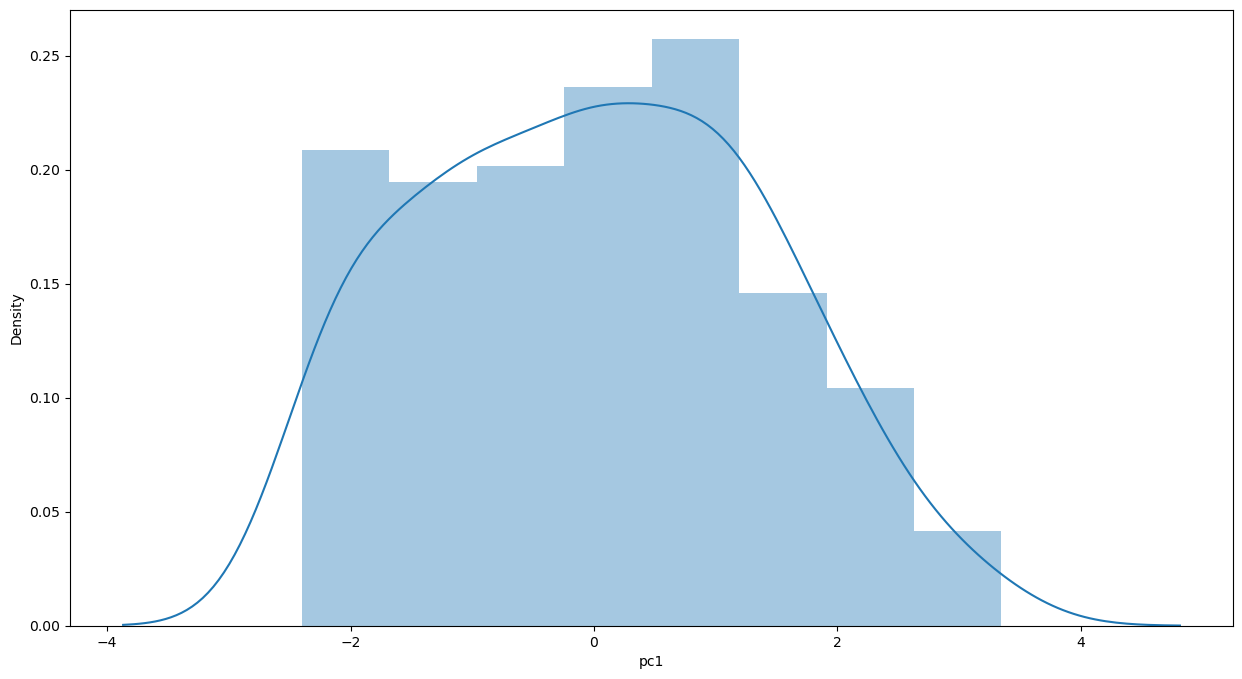

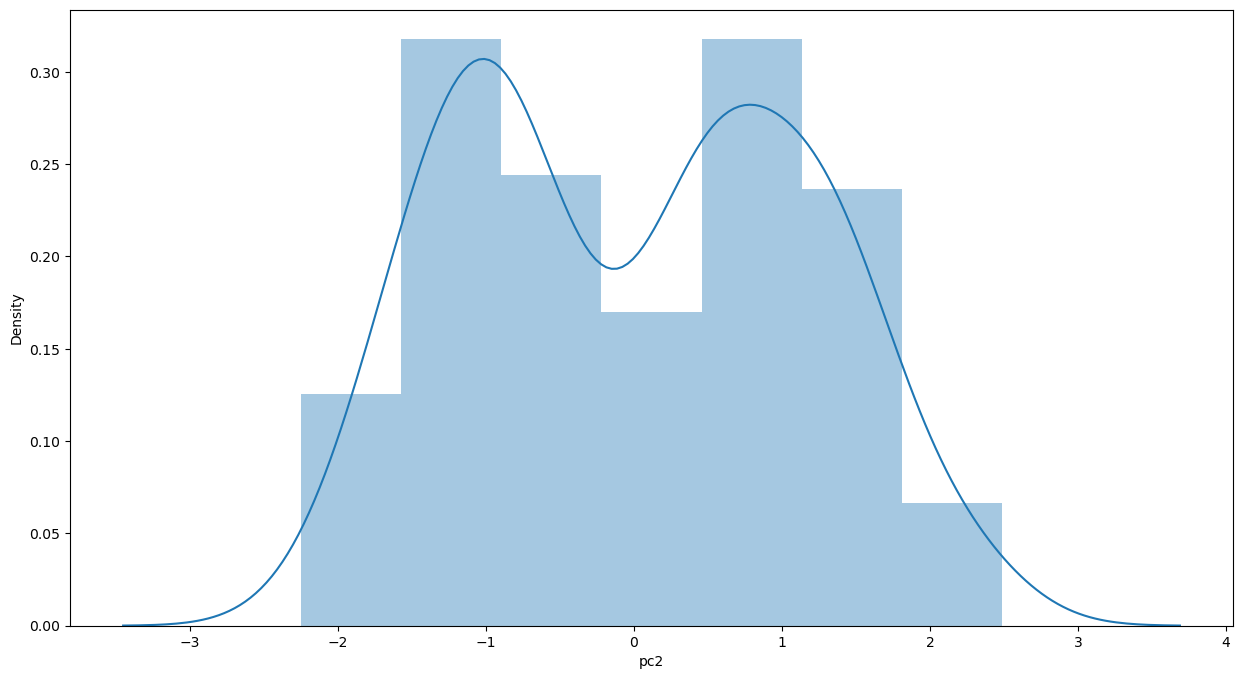

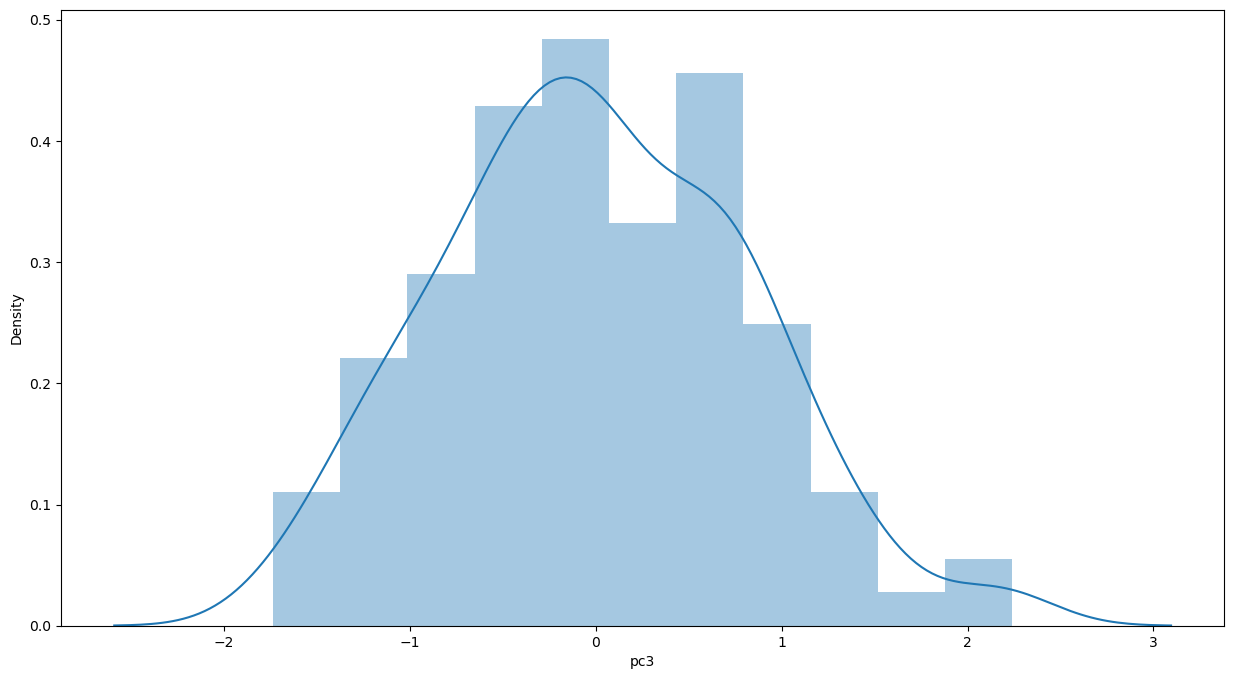

In [28]:
for i in pca_df.columns:
    sns.distplot(pca_df[i])
    plt.show()

# KMeans model

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
from sklearn.cluster import KMeans

In [31]:
for i in range(2,10):
    km = KMeans(n_clusters=i , random_state=10)
    k_pred = km.fit_predict(df)
    score = silhouette_score(df, k_pred, random_state=10)
    print("Sil score of ",i,"is",score)

Sil score of  2 is 0.2950433872825704
Sil score of  3 is 0.307336851235967
Sil score of  4 is 0.3692779308223213
Sil score of  5 is 0.37581650891555796
Sil score of  6 is 0.37929662450233764
Sil score of  7 is 0.3521272689868175
Sil score of  8 is 0.3253835126906725
Sil score of  9 is 0.3061307726169034


In [32]:
km = KMeans(n_clusters=6, random_state=10)
km.fit(pca_df)

KMeans(n_clusters=6, random_state=10)

In [33]:
km.labels_

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 4, 0,
       4, 0, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5,
       5, 2, 2, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 5, 5, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1,
       5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [34]:
pca_df["Kmeans"] = km.labels_
pca_df.head()

,pc1,pc2,pc3,Kmeans
0,-2.392310,-0.787697,1.327469,0
1,-2.338323,-1.837220,0.073115,0
2,-2.402448,0.129623,2.185060,4
3,-2.318615,-1.664185,0.083917,0
4,-2.342272,-0.243046,0.693267,4


<Axes: xlabel='pc1', ylabel='pc2'>

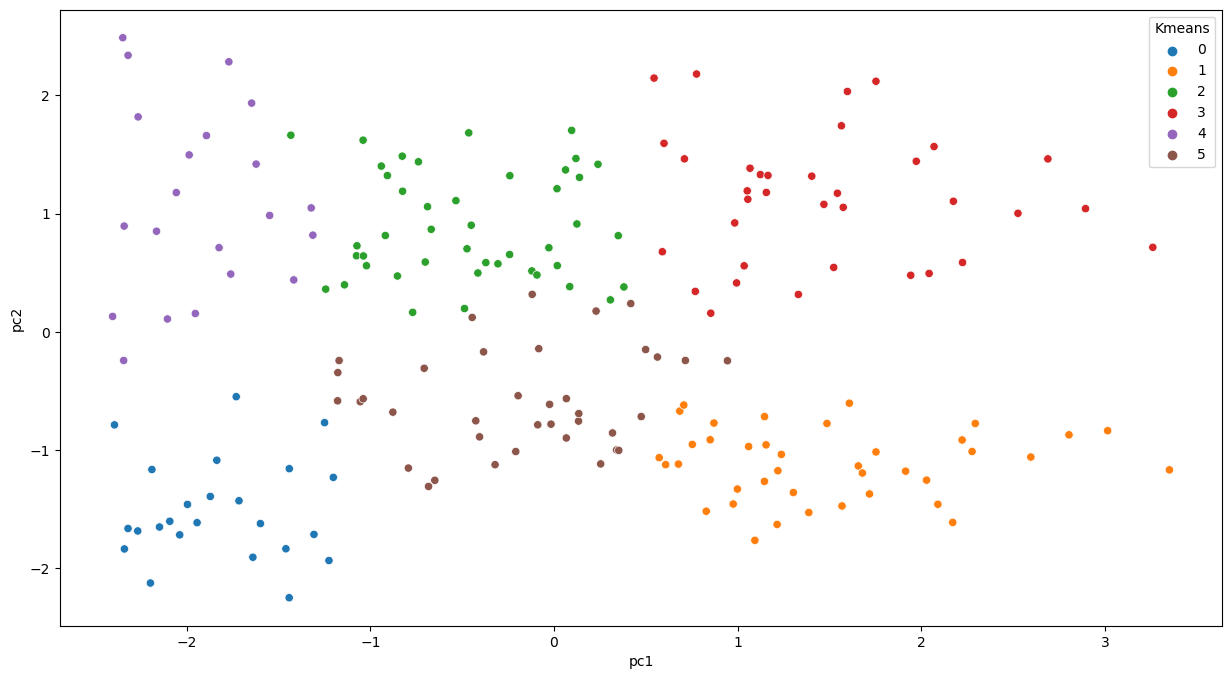

In [35]:
plt.figure(fig)
sns.scatterplot(x=pca_df['pc1'],y=pca_df['pc2'],hue=pca_df['Kmeans'],palette="tab10")

# Conclusion

From the above kmean model we can able to cluster the customers based on their purchase history. This helps in improving the growth of the business by identifying the regular customers and helps in creating the better strategies to improve the business.